![openclassrooms](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/courses/6204541/1+HnqdJ-5ofxiPP9HIxdNdpw.jpeg)

# Tracez des graphiques avec matplotlib

Vous êtes en train de préparer le reporting mensuel que vous devez présenter chaque fin de mois à votre responsable. La présentation devra comprendre certains graphiques clés : vous allez donc devoir utiliser vos compétences en data visualisation pour produire les différentes visualisations attendues.

Les graphiques à produire sont donc :
- la proportion de prêt par type de prêt
- le bénéfice mensuel réalisé en fonction du revenu du client
- la distribution des bénéfices réalisés
- le bénéfice mensuel total réalisé par agence


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Pour réaliser les différents graphiques, nous utiliserons le fichier de prêt enrichi ([c.f. exercice précédent](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P2/P2C3%20-%20Filtrez%20les%20donn%C3%A9es%20du%20data%20frame%20-%20correction.ipynb)) que vous trouverez [à cette adresse](https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv) :

In [3]:
# traitement réalisés précédemment
prets = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/main/data/prets_final.csv')

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices,risque
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99,Non
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,Non
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97,Non
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71,Non
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57,Non


## 1. proportion de prêt par type de prêt.

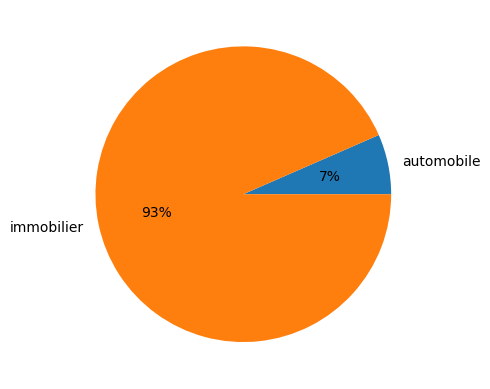

In [4]:
data = prets.groupby('type').agg(count=('type', 'count')).reset_index()
plt.pie(data['count'], labels=data['type'], autopct='%1.0f%%')
plt.show()

## 2. bénéfice mensuel réalisé en fonction du revenu du client

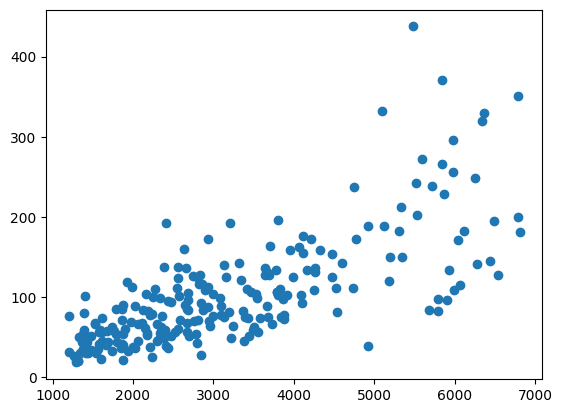

In [13]:
data = prets.loc[prets['type'] == 'immobilier', :]
plt.scatter(data['revenu'], data['benefices'])
plt.show()

## 3. La distribution des bénéfices réalisés

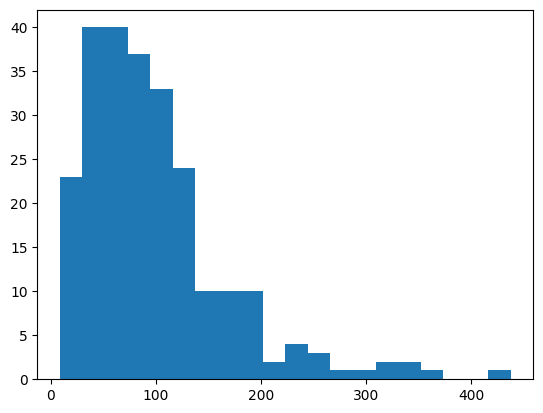

In [6]:
plt.hist(prets['benefices'], bins=20)
plt.show()

## 4. bénéfice mensuel total réalisé par agence

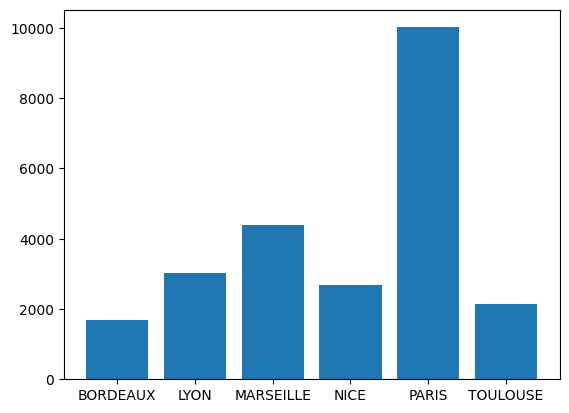

In [7]:
data = prets.groupby('ville').agg(benefice=('benefices', 'sum')).reset_index()
plt.bar(data['ville'], data['benefice'])
plt.show()

Félicitations pour être arrivé au bout ! Voici [la correction correspondante](https://colab.research.google.com/github/OpenClassrooms-Student-Center/fr-4452741-decouvrez-les-librairies-python-pour-la-data-science/blob/main/notebooks/P3/P3C2%20-%20Tracez%20des%20graphiques%20avec%20Matplotlib%20-%20correction.ipynb).

1. proportion de prêt par type de prêt.

In [8]:
# On peut
# avec groupby :
type_agreg = prets.groupby('type').size().reset_index()

# via la fonction value_counts :
type_agreg = prets['type'].value_counts().reset_index()

# renommer toutes les colonnes en une fois :
type_agreg.columns = ['type','nombre']

type_agreg

,type,nombre
0,immobilier,228
1,automobile,16


<BarContainer object of 2 artists>

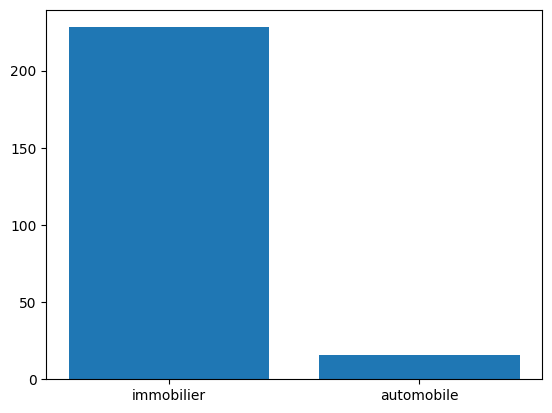

In [9]:
# diagramme à barres

plt.bar(type_agreg['type'], type_agreg['nombre'])

([<matplotlib.patches.Wedge at 0x7a5fd5ac7830>,
 [Text(-1.076741279021292, 0.22500715111212047, 'immobilier'),
  Text(1.0767412986920384, -0.22500705698040363, 'automobile')],
 [Text(-0.5873134249207046, 0.12273117333388386, '93.44%'),
  Text(0.5873134356502027, -0.12273112198931106, '6.56%')])

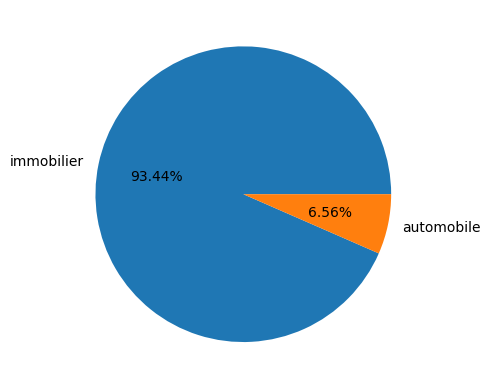

In [10]:
# diagramme circulaire

plt.pie(x=type_agreg['nombre'], labels=type_agreg['type'], autopct='%.2f%%')

2. bénéfice mensuel réalisé en fonction du revenu du client - prêts immobiliers

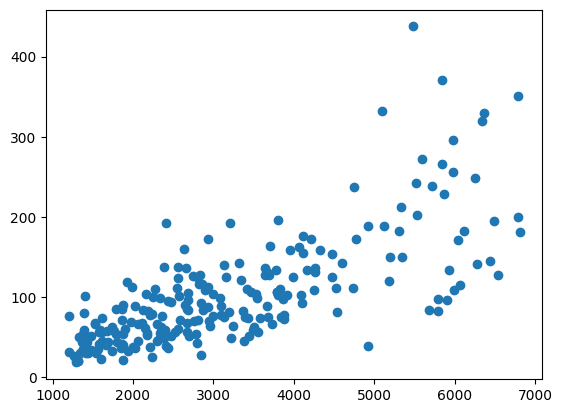

In [14]:
prets_imo = prets.loc[prets['type'] == 'immobilier', :]
plt.scatter(prets_imo['revenu'], prets_imo['benefices'])

3. La distribution des bénéfices réalisés

(array([63., 77., 57., 20., 12.,  7.,  2.,  4.,  1.,  1.]),
 array([  8.49 ,  51.404,  94.318, 137.232, 180.146, 223.06 , 265.974,
        308.888, 351.802, 394.716, 437.63 ]),
 <BarContainer object of 10 artists>)

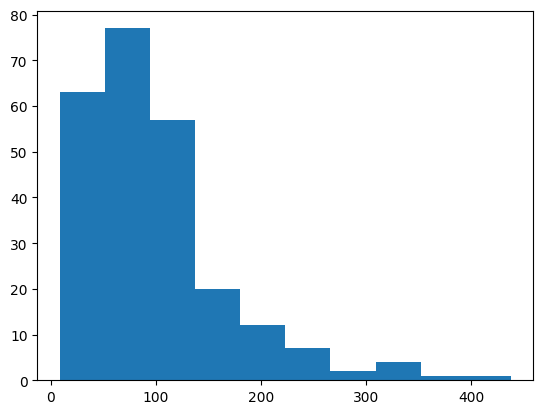

In [15]:
plt.hist(prets['benefices'])

 4. bénéfice mensuel total réalisé par agence
# Nouvelle section

<BarContainer object of 6 artists>

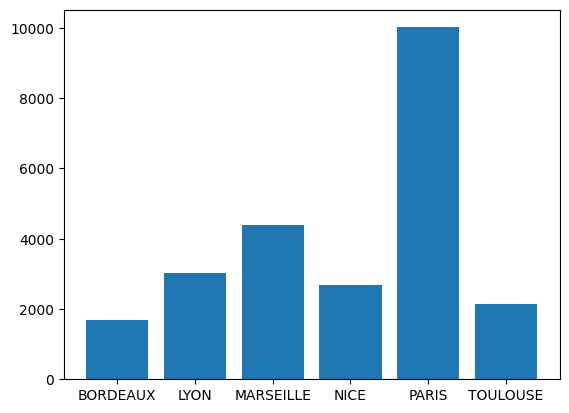

In [19]:
data_benef = prets.groupby('ville')['benefices'].sum().reset_index()
plt.bar(data_benef['ville'], data['benefices'])